## Random Forest Classifier/Regressor, Cross Validation, VarianceThreshold, PCA

In [1]:
# import libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import VarianceThreshold, RFE
from sklearn.decomposition import PCA
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import confusion_matrix
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

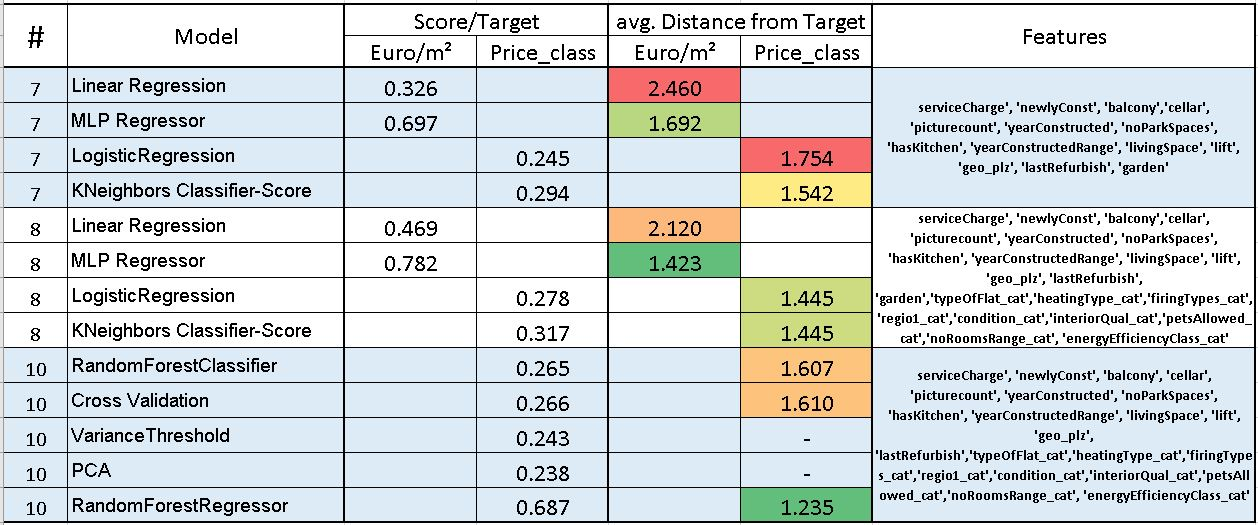

In [2]:
# load data set
pd.set_option('display.max_columns', None)
data = pd.read_csv('immo_cat.csv')
data = data.drop(['Unnamed: 0.1', 'Unnamed: 0'], axis=1)
cols = ['newlyConst', 'balcony', 'hasKitchen','lift', 'garden','cellar']
data[cols] = data[cols].replace({True:1,False:0})
data = data[['serviceCharge', 'newlyConst', 'telekomHybridUploadSpeed', 'balcony', 'cellar', 'picturecount', 'yearConstructed', 'noParkSpaces', 'hasKitchen', 'yearConstructedRange', 'livingSpace', 'lift', 'lastRefurbish','typeOfFlat_cat','heatingType_cat','firingTypes_cat','regio1_cat','condition_cat','interiorQual_cat','petsAllowed_cat','energyEfficiencyClass_cat','price_class']].copy()
data.head(1)

,serviceCharge,newlyConst,telekomHybridUploadSpeed,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,energyEfficiencyClass_cat,price_class
0,245.0,0,0.0,0,1,6,1965.0,1.0,0,2.0,86.0,0,2009.1,0.4,0.54,0.52,0.51,0.57,0.3,0.95,0.61,4


In [3]:
y = data['price_class']
X = data.drop(['price_class'], axis = 1)

numericalX = X.select_dtypes(np.number)
categoricalX = X.select_dtypes(np.object)

# we OneHotEncode the categoricals so we can use the same dataset to perform a regression later.
# it is not needed for a DecisionTree or RandomForest model-->no one hot encoding needed, but do for later

encoder = OneHotEncoder(drop='first').fit(categoricalX)
encoded_categorical = encoder.transform(categoricalX).toarray()
encoded_categorical = pd.DataFrame(encoded_categorical)
X = pd.concat([numericalX, encoded_categorical], axis = 1)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
trainset=pd.concat([y_train, X_train ], axis=1)
trainset.head(3)

,price_class,serviceCharge,newlyConst,telekomHybridUploadSpeed,balcony,cellar,picturecount,yearConstructed,noParkSpaces,hasKitchen,yearConstructedRange,livingSpace,lift,lastRefurbish,typeOfFlat_cat,heatingType_cat,firingTypes_cat,regio1_cat,condition_cat,interiorQual_cat,petsAllowed_cat,energyEfficiencyClass_cat
103504,8,250.0,0,0.0,1,1,18,2011.0,1.0,1,8.0,108.00,0,2015.0,0.4,0.54,0.48,0.82,0.61,0.56,1.0,0.61
253547,2,69.0,0,10.0,0,1,8,1960.0,0.0,0,2.0,57.68,0,2009.1,0.4,0.54,0.48,0.38,0.52,0.37,1.0,0.61
206819,7,165.0,1,0.0,1,0,13,2018.0,1.0,0,9.0,89.29,1,2009.1,0.4,0.84,0.48,0.51,1.00,0.56,0.9,0.52


In [5]:
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

# Random Forest Classifier

In [6]:
rfc = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20,
                             random_state = 42)
rfc.fit(X_train, y_train)
print(rfc.score(X_train,y_train))
print(rfc.score(X_test,y_test))
# Make predictions on the test data
y_pred2 = rfc.predict(X_test)

0.2653420335312348
0.2649079571337889


# Cross Validation (Random Forest Classifier)

In [7]:
# For cross validation
clf = RandomForestClassifier(max_depth=5,
                             min_samples_split=20,
                             min_samples_leaf =20)
cross_val_scores = cross_val_score(clf, X_train, y_train, cv=10)
clf.fit(X_train, y_train)
print(np.mean(cross_val_scores))
y_pred3 = clf.predict(X_test)

0.2656640862536089


In [8]:
# X_added_constant = sm.add_constant(X_train)
# X_added_constant
# model = sm.OLS(y_train,X_added_constant).fit()
# model.summary()

# Variance Threshold

In [9]:
vt = VarianceThreshold(threshold=0.05)
X_vt = vt.fit_transform(X_train)
scores_vt = cross_val_score(rfc, X_vt, y_train, cv=5, scoring='accuracy')
scores_vt.mean()

0.24325080799190818

# PCA

In [10]:
pca = PCA(n_components=6)
X_pca = pca.fit_transform(X_train)
scores_pca = cross_val_score(rfc, X_pca, y_train, cv=5, scoring='accuracy')
scores_pca.mean()

0.2387700256903343

# RandomForestRegressor

In [11]:
regr = RandomForestRegressor(max_depth=10,
                             criterion = 'squared_error',
                             min_samples_split=10,
                             min_samples_leaf = 10)
regr.fit(X_train, y_train)
print("train-score is:",regr.score(X_train, y_train))
print("test-score is:",regr.score(X_test, y_test))
y_pred4 = regr.predict(X_test)

train-score is: 0.6875813445256576
test-score is: 0.6781700422420414


#### Distance (Random Forest Classifier)

In [18]:
# -->calculates the average distance (difference) between target (price class) and prediction (predicted price class)
dist2=pd.concat([y_test], axis=1)
dist2['predicted'] = y_pred2
dist2['difference'] = round(((dist2['price_class']-dist2['predicted'])**2)**(1/2),2)
dist2.head(5)

,price_class,predicted,difference
113987,2,3,1.0
257282,4,4,0.0
29929,5,4,1.0
37788,9,8,1.0
196338,4,3,1.0


In [13]:
dist2['difference'].mean()

1.607090847989246

#### Distance (Cross Validation)

In [19]:
dist3=pd.concat([y_test], axis=1)
dist3['predicted'] = y_pred3
dist3['difference'] = round(((dist3['price_class']-dist3['predicted'])**2)**(1/2),2)
dist3.head(5)

,price_class,predicted,difference
113987,2,3,1.0
257282,4,4,0.0
29929,5,4,1.0
37788,9,8,1.0
196338,4,3,1.0


In [15]:
dist3['difference'].mean()

1.6099846906388857

#### Distance (RandomForestRegressor)

In [16]:
dist4=pd.concat([y_test], axis=1)
dist4['predicted'] = y_pred4
dist4['difference'] = round(((dist4['price_class']-dist4['predicted'])**2)**(1/2),2)
dist4.head(20)

,price_class,predicted,difference
113987,2,3.106027,1.11
257282,4,6.066072,2.07
29929,5,5.929627,0.93
37788,9,8.161182,0.84
196338,4,3.235820,0.76
11657,6,3.658316,2.34
210030,2,3.605836,1.61
92137,9,9.282672,0.28
263930,5,4.296278,0.70
142453,5,6.605034,1.61


In [17]:
dist4['difference'].mean()

1.2356624099174605